Pontificia Universidad Católica de Chile <br>
Departamento de Ciencia de la Computación <br>
IIC3670 -	Procesamiento de Lenguaje Natural<br>
Segundo Semestre 2025<br>


<h1><center>Tarea 1</center></h1>
        Profesor: Marcelo Mendoza<br>
        Fecha de entrega: 10 de Septiembre


---

## Indicaciones

Deberás entregar **SOLO** el archivo .ipynb en el buzón respectivo en canvas.

**IMPORTANTE**:
- Se te dará puntaje tanto por código como por la manera en la que respondas las preguntas planteadas.
- El notebook debe tener todas las celdas de código ejecutadas.
- Cualquier instancia de copia resultará en un 1,1 como nota de curso.

---

## **Integrantes**:
* Integrante1: Diego Larraguibel.
  
* Integrante2: Ignacio Vergara.

## Librerias

In [1]:
#AQUI importa las librerias extras que vayas a ocupar
#TODO
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nela_features.nela_features import NELAFeatureExtractor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from nltk.util import ngrams
import collections

pygame 2.6.1 (SDL 2.28.4, Python 3.10.8)
Hello from the pygame community. https://www.pygame.org/contribute.html


### Referencias de los Datasets

De todas formas, los csv se encontrarán disponibles en Canvas

* El dataset a utilizar para la parte 2 fue extraído de: https://www.kaggle.com/datasets/luisdiegofv97/imdb-dataset-of-50k-movie-reviews-spanish

* El dataset a utilizar para la parte 3 fue extraído de: https://huggingface.co/datasets/mltrev23/financial-sentiment-analysis/blob/main/archive.zip

# Parte 1: NELA Features (15 puntos)

Usa 'fetch_20newsgroups' para obtener los datos a utilizar tanto de train como de test

**RESPUESTA**:

In [2]:
X_trainfecth, y_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'), return_X_y=True)
X_testfecth, y_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'), return_X_y=True)

### 1.1 Análisis descriptivo (5 puntos)

Realiza el preprocesamiento de datos (hint: STOPWORDS, Tokenizer, Lemmatizer etc. Utilice lo que crea que es mejor para su modelo). 

In [3]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer, sent_tokenize
from nltk.stem import WordNetLemmatizer

# Load stop-words
stop_words = set(stopwords.words('english'))

# Initialize tokenizer
# It's also possible to try with a stemmer or to mix a stemmer and a lemmatizer
tokenizer = RegexpTokenizer('[\'a-zA-Z]+')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

def tokenize(document):
    words = []

    for sentence in sent_tokenize(document):
        tokens = [lemmatizer.lemmatize(t.lower()) for t in tokenizer.tokenize(sentence) if t.lower() not in stop_words and len(t) > 2]
        words += tokens
    text = " ".join(words)
    return text

In [4]:
corpus_train = []
corpus_test = []

for review in X_trainfecth:
    document = tokenize(review)
    corpus_train.append(document)


for review in X_testfecth:
    document = tokenize(review)
    corpus_test.append(document)

KeyboardInterrupt: 

Cree una nube de palabras utilizando el dataset de entrenamiento (una vez tokenizado). Haga uno para el primer elemento del dataset y otro para todos los elementos del dataset. Les puede servir: https://www.kaggle.com/code/anandhuh/word-cloud-in-python-for-beginners

RESPUESTA:

Muestra para el primer documento del df de entrenamiento limpiado previamente

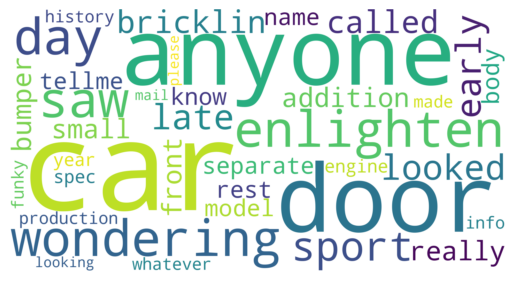

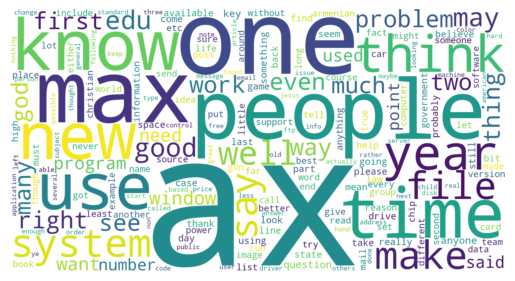

In [ ]:
# Para el primer documento del dataset de entrenamiento.
word_cloud1 = WordCloud(collocations = False, background_color = 'white', width = 2048, height = 1080).generate(corpus_train[0])
plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")
plt.show()

# Para todos los elementos del dataset de entrenamiento.
corpus_mixed = corpus_train[0]
for doc in corpus_train[1:]:
    corpus_mixed += ' ' + doc
word_cloud2 = WordCloud(collocations = False, background_color = 'white', width = 2048, height = 1080).generate(corpus_mixed)
plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")
plt.show()


Visualiza los 10 bigramas más comunes del corpus

In [ ]:
esBigrams = ngrams(corpus_mixed.split(), 2)
esBigramFreq = collections.Counter(esBigrams)

# what are the ten most popular ngrams in this Spanish corpus?
esBigramFreq.most_common(10)

[(("'ax", "'ax"), 56158),
 (('max', "'ax"), 4340),
 (("'ax", 'max'), 4306),
 (('would', 'like'), 429),
 (('united', 'state'), 301),
 (('anyone', 'know'), 294),
 (('new', 'york'), 284),
 (('year', 'ago'), 260),
 (('last', 'year'), 258),
 (('thanks', 'advance'), 236)]

**RESPUESTA**: Apoyo en [Fuente ngrams](https://www.kaggle.com/code/rtatman/tutorial-getting-n-grams)

¿Qué bigramas y palabras son más comunes en el corpus? ¿Aparece algo raro? HINT: Pueden aparecer elementos que parecieran palabras pero no lo son

**RESPUESTA**:

Explique para que se utiliza Lemmatizer, tokenizer y stopwords.

**RESPUESTA**:

## 1.2 Nela Features (5 puntos)

Extraiga características utilizando NELA. Basta con que ocupe una de las características y NO puede utilizar extract_styles. Hint: Recordar que si largo del documento es 0, entonces debe generar un vector del tamaño de las características que vaya a utilizar. 

EJEMPLO: Cuando se utilizaba nela.extract_style se extraen 50 features y por lo tanto se tienen vectores de tamaño 50. Si el largo del documento es 0, no se puede extraer las características (porque no hay documento) y por lo tanto se debe generar un vector del mismo tamaño (50 en este caso) rellenado de 0. Este vector lo pueden llamar como 'vector cero' o 'vector nulo'.

**RESPUESTA**:

Utilizar modelo de la AF2: MultinomialNB. Recuerde que se transforma a np.array

**RESPUESTA**:

Utilice la matriz de confusión para evaluar el rendimiento del modelo. Es una buena forma de visualizar el desempeño

**RESPUESTA**:


¿Qué ocurre con el modelo? ¿Funciona bien o mal? ¿Qué está tratando de hacer con los datos y cuál es su objetivo? Fundamente

**RESPUESTA**:

¿Cómo se compara con el resultado obtenido en la AF2? (puede revisar el github, donde se encontrarán las soluciones de las actividades formativas)

**RESPUESTA**:

¿Qué se podría realizar para mejorar la precisión del modelo?

**RESPUESTA**:

## 1.3: TF-IDF (5 puntos)

Dado que es posible que haya malos resultados, se probará otra forma de entrenar y clasificar estos textos. Utilice un modelo TF-IDF para representar los documentos

Separe la data en X_train, y_train, X_test e y_test

**RESPUESTA**: La separación fue hecha en el fetcheo de los datos, se transforman X_train y X_test

In [ ]:
# Usando lo visto en clases de Tf-Idf
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(corpus_train)
X_test = vectorizer.transform(corpus_test) 

Utilice TfidfVectorizer para transformar los textos en vectores TF-IDF.

**RESPUESTA**:

Utilice la librería make_pipeline de sklearn que incluye el TfidfVectorizer y el clasificador que desee utilizar (por ejemplo, SGDClassifier o LogisticRegression).


**RESPUESTA**:

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

clf =  LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
print(classification_report(y_test, y_predict))

c = make_pipeline(vectorizer, clf)


              precision    recall  f1-score   support

           0       0.50      0.48      0.49       319
           1       0.64      0.69      0.67       389
           2       0.65      0.57      0.61       394
           3       0.65      0.64      0.65       392
           4       0.72      0.67      0.69       385
           5       0.79      0.72      0.76       395
           6       0.75      0.78      0.76       390
           7       0.77      0.68      0.72       396
           8       0.49      0.81      0.61       398
           9       0.80      0.82      0.81       397
          10       0.91      0.88      0.89       399
          11       0.89      0.67      0.76       396
          12       0.56      0.61      0.58       393
          13       0.74      0.80      0.77       396
          14       0.72      0.76      0.74       394
          15       0.64      0.78      0.70       398
          16       0.59      0.68      0.63       364
          17       0.87    

¿Por qué cambió los resultados? 

**RESPUESTA**:

# Parte 2: Word2Vec (20 puntos)

### 2.1 Teóricas (5 puntos)

Para resolver las preguntas deberá utilizar la siguiente página: https://projector.tensorflow.org

En la página entregada anteriormente, use el tensor 'Word2Vec 10k', busque la palabra 'learning' con 20 vecinos y anote las 3 palabras más parecidas y las 3 más alejadas, dejando claramente a que categoría pertenece y dejando los valores correspondiente al usar la distancia del coseno. Para la reducción de dimensionalidad, mantenga el uso de PCA.

**RESPUESTA**:

Las tres palabras más parecidas a "learning" bajo la distancia del coseno corresponden a "studying" ($0.67$), "creating" ($0.668$) y "motivation ($0.666$) y las tres menos parecidas corresponden a "cognitive" ($0.571$), "teaching" ($0.565$) y "knowledge" ($0.565$).

## TODO: A qué se refiere con categoría acá? y los valores que entrega son de similitud o distance?

¿Qué mide la distancia del coseno y que relación hay con la similitud del coseno?

**RESPUESTA**:

Por otro lado, la similitud del coseno mide, valga la redundancia, cuan similares son dos vectores en cuánto a orientación. Para ello calcula el coseno del ángulo entre estos, por lo que a menor angulo, mayor similitud ($\cos(\theta) \sim 1$ para $\theta \sim 0$). Se calcula como

$$
\operatorname{sim}_{cos}(x, y) = \frac{x\cdot y}{\|x\|\|y\|}
$$ 

La distancia del coseno mide cuán diferentes son dos vectores en cuanto a orientación, realiza esto calculando el complemento de la similitud entre ellos, es decir cuan lejano se encuentran los vectores de ser iguales en ángulo. Se calcula como 

$$d_{cos}(x, y) = 1 - \operatorname{sim}_{cos}(x, y) = 1 - \frac{x\cdot y}{\|x\|\|y\|}$$


Explique la relación de los valores obtenidos anteriormente con las palabras encontradas

**RESPUESTA**:

El vector que representa a la palabra "learning" tiene una orientación similar a los vectores asociados a "studying", "creating" y "motivation", por lo que su producto punto se maximiza y con ello su similitud, por otro lado, aquellas palabras con menor similitud al no lograr maximizar tanto el producto punto se infiere que tienen una orientación menos similar por lo que se entiende que son palabras menos relacionadas.

Fuentes: [Fuente 2.1 cosine similarity y cosine distance](https://pub.aimind.so/understanding-cosine-similarity-and-cosine-distance-in-depth-cc91eac3ef2)

## 2.2 Análisis de Dataset (5 puntos)

El archivo de canvas (Dataset) proviene de: https://www.kaggle.com/datasets/luisdiegofv97/imdb-dataset-of-50k-movie-reviews-spanish

¿Qué contiene el dataset?

**RESPUESTA**:

In [5]:
import pathlib
#crea la ruta a data_T1 y dsp lee el csv
parent = pathlib.Path()
ruta = parent / 'data-T1' / 'IMDB_Dataset.csv'
df = pd.read_csv(ruta)

In [6]:
df.head()

,Unnamed: 0,review_en,review_es,sentiment,sentimiento
0,0,One of the other reviewers has mentioned that ...,Uno de los otros críticos ha mencionado que de...,positive,positivo
1,1,A wonderful little production. The filming tec...,Una pequeña pequeña producción.La técnica de f...,positive,positivo
2,2,I thought this was a wonderful way to spend ti...,Pensé que esta era una manera maravillosa de p...,positive,positivo
3,3,Basically there's a family where a little boy ...,"Básicamente, hay una familia donde un niño peq...",negative,negativo
4,4,"Petter Mattei's ""Love in the Time of Money"" is...","El ""amor en el tiempo"" de Petter Mattei es una...",positive,positivo


El dataset contiene reviews de películas tanto en inglés como en español, además del sentimiento asociado a la review (este también se encuntre tanto en inglés como en español).

¿Cuántas filas tiene el dataset?

**RESPUESTA**: El dataset tiene 50000 filas y 5 columnas

In [ ]:
print(f"El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas")

El dataset tiene 50000 filas y 5 columnas


Vea la distribución del número de palabras mediante un gráfico

**RESPUESTA**:

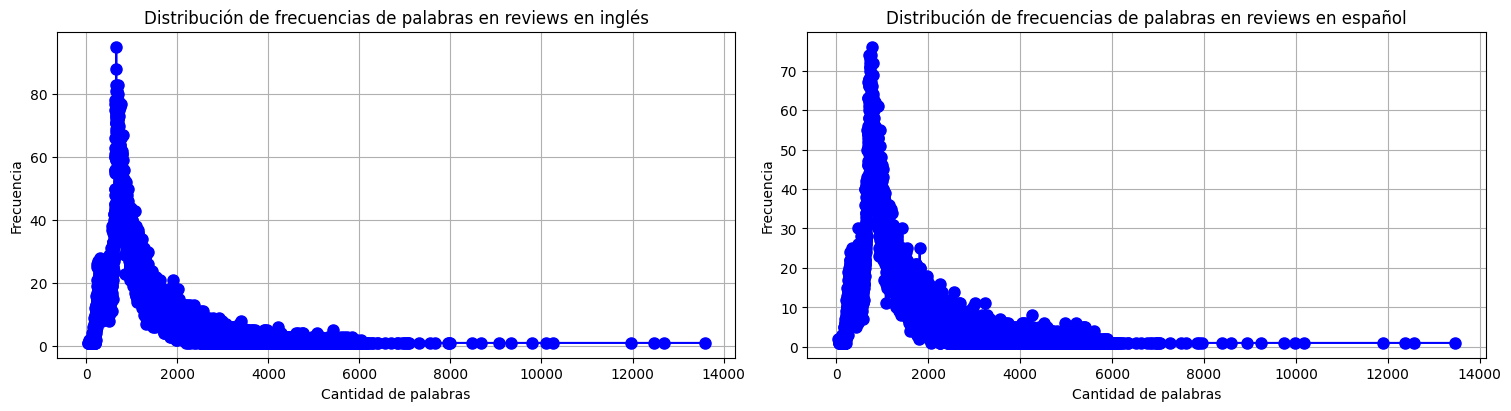

In [ ]:
palabras_en = [len(i) for i in df["review_en"]]
palabras_es = [len(i) for i in df["review_es"]]


palabras_counts_en = {}
for cant in palabras_en:
    if cant in palabras_counts_en:
        palabras_counts_en[cant] += 1
    else:
        palabras_counts_en[cant] = 1

sorted_counts_en = sorted(palabras_counts_en.items())

x_en, y_en = zip(*sorted_counts_en)

palabras_counts_es = {}
for cant in palabras_es:
    if cant in palabras_counts_es:
        palabras_counts_es[cant] += 1
    else:
        palabras_counts_es[cant] = 1

sorted_counts_es = sorted(palabras_counts_es.items())

x_es, y_es = zip(*sorted_counts_es)

# Graficar la distribución de frecuencia de palabras en reviews en inglés y español 
fig, axes = plt.subplots(1, 2, figsize=(15, 4), constrained_layout=True)
ax1, ax2 = axes

ax1.plot(x_en, y_en, 'bo-', markersize=8)
ax1.set_title('Distribución de frecuencias de palabras en reviews en inglés')
ax1.set_xlabel('Cantidad de palabras')
ax1.set_ylabel('Frecuencia')
ax1.grid(True)

ax2.plot(x_es, y_es, 'bo-', markersize=8)
ax2.set_title('Distribución de frecuencias de palabras en reviews en español')
ax2.set_xlabel('Cantidad de palabras')
ax2.set_ylabel('Frecuencia')
ax2.grid(True)
plt.show()

De los gráficos anteriores se puede observar que existe una clara concentración de reviews con una cantidad de palabras en torno a $1000$ con un fuerte decaimiento a casos extremos inclusive llegando casi a $14.000$ palabras.

Crea una nube de palabras para el dataset mostrando las palabras más frecuentes en el texto. Primero utilice para el corpus la concatenación de todos los textos de la columna "review_es" y luego realice tokenización y genere otra nube de palabras.

**RESPUESTA**:

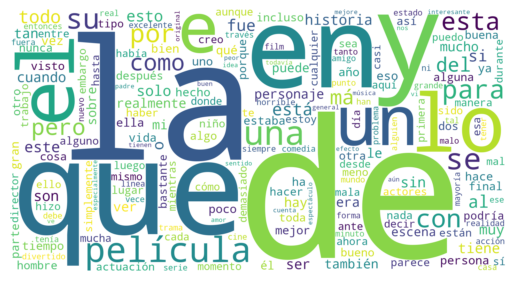

In [8]:
concat_es = df["review_es"].str.cat(sep=' ')
word_cloud3 = WordCloud(collocations = False, background_color = 'white', width = 2048, height = 1080).generate(concat_es)
plt.imshow(word_cloud3, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Ahora tokenizando, se modifica el tokenizer para español
import re
from nltk.stem.snowball import SnowballStemmer
# Load stop-words
stop_words_es = set(stopwords.words('spanish'))

# Initialize tokenizer
# It's also possible to try with a stemmer or to mix a stemmer and a lemmatizer
tokenizer_es = RegexpTokenizer(r'\w+', flags=re.UNICODE)   # Para permitir tildes en las palabras y ñ´s

# Initialize lemmatizer (especial para el español)
stemmer = SnowballStemmer('spanish')

def tokenize_es(document):
    words = []

    for sentence in sent_tokenize(document, language='spanish'):
        for t in tokenizer.tokenize(sentence):
            t = t.lower()
            if t not in stop_words and len(t) > 2:
                words.append(stemmer.stem(t))
    text = " ".join(words)
    return text


corpus_es = []

for review in df["review_es"]:
    document = tokenize_es(review)
    corpus_es.append(document)
corpus_es


['uno los otros tic mencion que despu ver sol episodi estar enganch tien raz que esto exact que sucedi conmig primer cos que golp sobr fue brutal sus escen violenci inconfi que encuentr derech palabr conf este espect cul par los bil coraz mid este espect cul extra punzon con respect las drog sex violenci hardcor uso sic palabr llam que apod dad penitenciari del estad segur xim oswald centr principal ciud emerald una secci experimental prisi dond tod las lul tien frent vidri enfrent haci adentr por que privac alta agend city hog much fariari musulman gangst latin cristian italian irlandes que las espos las mir muert las relacion peligr los acuerd sombr nunc est lej dir principal atract espect cul deb hech que dond otros espect cul atrev olv dat las gen bonit pint par las audienci convencional olvid encant olvid romanc met prim episodi que vist sorprendi tan desagrad que fue surreal pod dec que estab list par ello per cuand observ desarroll gust por acostumbr los altos nivel violenci fic

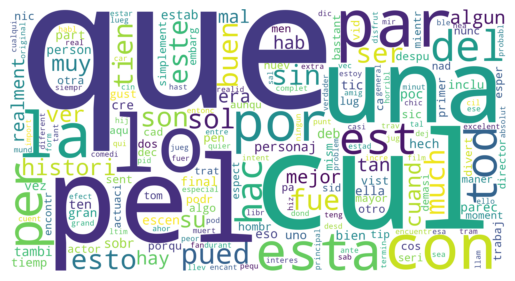

In [12]:
corpus_es_mixed = " ".join(corpus_es)
word_cloud4 = WordCloud(collocations = False, background_color = 'white', width = 2048, height = 1080).generate(corpus_es_mixed)
plt.imshow(word_cloud4, interpolation='bilinear')
plt.axis("off")
plt.show()

## 2.3 Transformación a Embeddings (5 puntos)

Transforme los reviews en español a vectores (embeddings)

**RESPUESTA**:

## TODO: Duda, se hace sobre el corpus tokenizado?

In [13]:
corpus_es_def = [review.split() for review in corpus_es]

In [ ]:
from gensim.models import Word2Vec
model = Word2Vec(sentences=corpus_es_def, vector_size=100, window=5, min_count=1, workers=4, sg=1)  # Se realiza usando skip-grams
# ya con este modelo se

In [ ]:
model.wv.vectors.shape  # Clatramente tienen sentido las dimensiones que entrega el embbeding del modelo

(114498, 100)

In [39]:
# Se utiliza el modelo de W2V para generar el embedding de palabras mediante el promedio de los embedding de cada palabra
def embed_review(review):
    return np.mean(model.wv[review], axis=0)
X_es = np.array([embed_review(review) for review in corpus_es_def])

## 2.4 Generación de gráficos (5 puntos)

Utilice PCA con 3 componentes sobre los embeddings

**RESPUESTA**:

In [41]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_es_3d = pca.fit_transform(X_es)
print(f"Varianza total explica {sum(pca.explained_variance_ratio_)}")

Varianza total explica 0.7113266121596098


Realizando lo anterior, se podría considerar como puntos en 3D y nos permite visualizar en el espacio. Realice una visualización de los puntos en 3D, coloreando cada clase.

**RESPUESTA**:

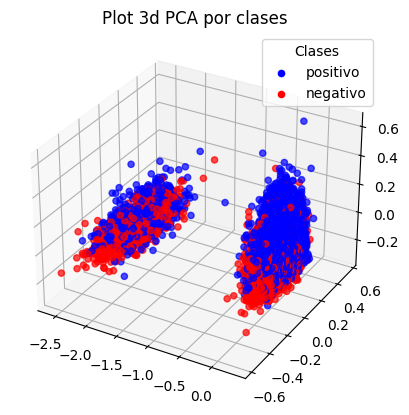

In [ ]:
df_toplot = pd.DataFrame(X_es_3d, columns=['PCA1', 'PCA2', 'PCA3'])
df_toplot["Clases"] = df["sentimiento"]
# Se filtran los PCA asociados a cada sentimiento para plotearlos de manera segmentada
fig = plt.figure(figsize = (12, 6))
ax = plt.axes(projection='3d')
colores = {"positivo": "blue", "negativo": "red"}
cmap = df_toplot["Clases"].map(colores).to_numpy()
ax.scatter(df_toplot["PCA1"], df_toplot["PCA2"], df_toplot["PCA3"],c=cmap, alpha=0.7)
ax.set_title('Plot 3d PCA por clases')
# Para la leyenda
for clase, color in colores.items():
    ax.scatter([], [], [], c=color, label=clase)
ax.legend(title="Clases")
plt.show()

Utilice t-SNE y vuelva realizar el gráfico

**RESPUESTA**:

In [61]:
from sklearn.manifold import TSNE
# Para hacer más rápido se hace T-SNE al resultado de hacer PCA que conserva el 95% de la varianza
pca_2 = PCA(n_components=0.95)
tsne = TSNE(n_components=3, random_state=42)
X_es_tsne = tsne.fit_transform(pca_2.fit_transform(X_es))

KeyboardInterrupt: 

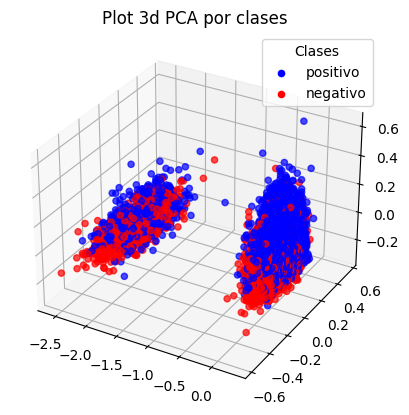

In [ ]:
# De la misma manera que como se hizo para PCA
df_toplot_TSNE = pd.DataFrame(X_es_tsne, columns=['T_SNE1', 'T_SNE2', 'T_SNE3'])
df_toplot_TSNE["Clases"] = df["sentimiento"]
fig = plt.figure(figsize = (12, 6))
ax = plt.axes(projection='3d')
colores = {"positivo": "blue", "negativo": "red"}
cmap = df_toplot_TSNE["Clases"].map(colores).to_numpy()
ax.scatter(df_toplot_TSNE["T_SNE1"], df_toplot_TSNE["T_SNE2"], df_toplot_TSNE["T_SNE3"],c=cmap, alpha=0.7)
ax.set_title('Plot 3d T-SNE por clases')
# Para la leyenda
for clase, color in colores.items():
    ax.scatter([], [], [], c=color, label=clase)
ax.legend(title="Clases")
plt.show()

¿Qué se puede concluir con las visualizaciones realizadas por las dos reducciones de dimensionalidad? 

**RESPUESTA**:

¿Qué limitaciones tiene utilizar reducción de dimensionalidad en los embeddings? ¿Los usaría para entrenar?

**RESPUESTA**:

TODO: Revisar. El utilizar reducción de dimensionalidad en los embeddings tiene la limitación de perder información (lo que se puede ver por ejemplo en el caso de PCA donde la varianza explicada no cubre toda la del espacio original) valiosa asociada a los datos (en específico del contexto de los mismo, CREO), por lo que si se usan para entrenar se obtiene un modelo subóptimo. Sin embargo, en caso de tener limitaciones de recursos computacionales puede ser una buena opción trabajar con reducción de dimensionalidad pues se gana múchisimo en memoria utilizada.

# Parte 3: Análisis de Sentimiento (25 puntos)

### Parte 3.1: Pruebas de Análisis de Sentimiento (4 puntos)

Usar la librería de Textblob para la actividad.

Cargue el dataset proveniente de: https://huggingface.co/datasets/mltrev23/financial-sentiment-analysis/blob/main/archive.zip

**RESPUESTA**:

Escoja dos documentos y utilice TextBlob sobre ellos.
Métodos a utilizar: tags, sentiment, polarity, subjectivity y words

**RESPUESTA**:

¿Qué es lo que señala TextBlob en los documentos seleccionados? ¿Funciona correctamente? Justifique. Hint: Para ver si funciona correctamente compare los resultados obtenidos con los labels del dataset y si la Sentence es acorde a los resultados obtenidos

**RESPUESTA**:

Pruebe utilizando TextBlob con la frase de Beneditti ‘De qué sirve querer olvidar, a veces simplemente se trata de aprender a vivir con eso’. Luego pruebe la segunda frase 'La vida es una lucha constante'. Justifique los resultados.

**RESPUESTA**:

¿Qué haría usted para mejorar la clasificación de análisis de sentimiento para el idioma Español pero dando prioridad a como hablamos los chilenos?

**RESPUESTA**:

¿Podría haber problemas al realizar el análisis de sentimiento para un español generalizado y en particular con insultos? Explique

**RESPUESTA**:

#### Lectura Opcional: Hay una librería llamada `vaderSentiment` que puede ser útil para el análisis de sentimientos. Además hay otro paquete que permite analizar el sentimiento en varios idiomas llamado `vader-multi`.
https://github.com/brunneis/vader-multi

### Parte 3.2: Clasificación de análisis de sentimiento con Word2Vec (9 puntos)

Haga un procesamiento de los datos (Sentences)

**RESPUESTA**:

Guarde los labels en una variable y

**RESPUESTA**:

Transforme el texto a embeddings. Probablemente necesites tener vectores de tamaño fijo, así que considera usar un enfoque como padding o truncamiento.

**RESPUESTA**:

Divida los datos en conjuntos de entrenamiento y prueba. Además crea un array de índices para utilizar en el train_test_split. Es importante para utilizar en el LimeExplainer después.

**RESPUESTA**:

Utilice el modelo (SGD  o regresión logística) para clasificar las 3 clases y muestre la matriz de confusión

**RESPUESTA**:

Utilice LimeTextExplainer para interpretar las predicciones de su modelo. Esto le permitirá entender qué palabras o frases están influyendo más en las decisiones del clasificador.

HINT: Cree una funcion que reciba los textos, use el tokenize y agregalos en una lista. Luego utilice el modelo para predecir sobre la lista de los embeddings. LimeTextExplainer necesita una función que reciba los textos. 

**RESPUESTA**:

¿Los resultados fueron buenos o malos? Fundamente

**RESPUESTA:**

¿Cómo mejoraría el modelo? 

**RESPUESTA:**

### Parte 3.3: Clasificación de análisis de sentimiento con GloVe (12 puntos)

Muestre los modelos que contiene gensim (código de clases o formativa)

**RESPUESTA**:

Cargue algunos de los modelos anteriores (ej: glove-wiki-gigaword-50)

**RESPUESTA**:

Transforme el texto a embeddings utilizando GloVe

**RESPUESTA**:

Crear un MLP que clasifique entre las 3 clases. Recordar lo utilizado para LimeText.

**RESPUESTA**:

Utilice LimeTextExplainer para interpretar las predicciones de su modelo.

**RESPUESTA**:

¿Por qué es mejor este último clasificador? 

**RESPUESTA**: